Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5845083636993086
Cost after iteration 200: 0.4669490409465546
Cost after iteration 300: 0.37600686694802077
Cost after iteration 400: 0.3314632893282512
Cost after iteration 500: 0.3032730674743829
Cost after iteration 600: 0.2798795865826048
Cost after iteration 700: 0.26004213692587574
Cost after iteration 800: 0.24294068467796615
Cost after iteration 900: 0.22800422256726066
Cost after iteration 1000: 0.2148195137844964
Cost after iteration 1100: 0.2030781906064499
Cost after iteration 1200: 0.19254427716706862
Cost after iteration 1300: 0.18303333796883514
Cost after iteration 1400: 0.17439859438448874
Cost after iteration 1500: 0.16652139705400332
Cost after iteration 1600: 0.1593045182975662
Cost after iteration 1700: 0.15266732471296507
Cost after iteration 1800: 0.14654223503982333
Cost after iteration 1900: 0.14087207570310167
Train accuracy: 99.04%
Test accuracy: 70.00%
Misclassified indices: [ 5  6 10 11 

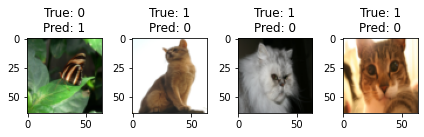

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load the dataset
def load_dataset():
    train_dataset = h5py.File("train_catvnoncat.h5", "r")
    test_dataset = h5py.File("test_catvnoncat.h5", "r")
    
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels
    
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])    # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])    # Test set labels
    
    classes = np.array(train_dataset["list_classes"][:])        # Classes (cat/non-cat)
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

# Flatten and standardize
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.0
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.0

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Forward and backward propagation
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    
    return grads, cost

# Optimization
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

# Prediction
def predict(w, b, X):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction

# Train the model
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    w = params["w"]
    b = params["b"]
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    print("Train accuracy: {:.2f}%".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Test accuracy: {:.2f}%".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations,
    }
    
    return d

# Run the model
d = model(train_x, train_y, test_x, test_y, num_iterations=2000, learning_rate=0.005)

# Misclassified examples
misclassified_indices = np.where(d["Y_prediction_test"] != test_y)[1]
print(f"Misclassified indices: {misclassified_indices}")

# Display misclassified images
for i, index in enumerate(misclassified_indices[:4]):  # Loop over the first 4 misclassified indices
    plt.subplot(1, 4, i + 1)  # Create subplots for displaying the images
    plt.imshow(test_x_orig[index])  # Show the misclassified image
    plt.title(f"True: {test_y[0, index]}\nPred: {d['Y_prediction_test'][0, index]}")  
plt.tight_layout()  # Adjust subplot layout for better appearance
plt.show()  # Show the plots

